In [3]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [64]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [38]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [39]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [40]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [7]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [8]:
predictions[0:5]

array([104.51164901, 158.42814434, 167.48757323, 160.10361555,
       203.32224444])

Text(0, 0.5, 'Predictions')

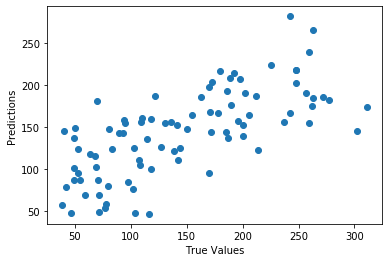

In [11]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [24]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 52.55849499311389
Train RMSE: 53.8968340273753


# Cross Validation

In [57]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [58]:
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [60]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### LOOCV

In [62]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [63]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [65]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


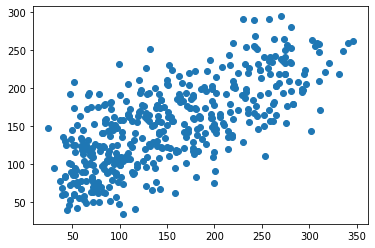

In [71]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [74]:
np.sqrt(mean_squared_error(y,predictions))

54.76342105528678

# tasks 

##### Find out cross validation results without using cross_val_predict

In [4]:
df = pd.read_csv('C:\\Users\\kmsl1\\Desktop\\ACA_ML\\Advertising.csv', index_col = 'ID') 
df

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


##### Implement cross validation without using sklearn at all

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

columns1 = df.columns

norm = MinMaxScaler().fit(df)
df =pd.DataFrame(columns = columns1, data=norm.transform(df))
y=df['Sales']
print(y)
df=df[df.columns.difference(['Sales'])]
df

0      0.807087
1      0.346457
2      0.303150
3      0.665354
4      0.444882
         ...   
195    0.236220
196    0.318898
197    0.440945
198    0.940945
199    0.464567
Name: Sales, Length: 200, dtype: float64


,Newspaper,Radio,TV
0,0.605981,0.762097,0.775786
1,0.394019,0.792339,0.148123
2,0.606860,0.925403,0.055800
3,0.511873,0.832661,0.509976
4,0.510994,0.217742,0.609063
...,...,...,...
195,0.118734,0.074597,0.126818
196,0.068602,0.098790,0.316199
197,0.053650,0.187500,0.596212
198,0.579595,0.846774,0.956713


# Feature Scaling

In [12]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('C:\\Users\\kmsl1\\Desktop\\ACA_ML\\regression.csv') 
data.head() 
y = data['Value']

In [108]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [144]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [145]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.172414,0.208333,0.404255,0.397959
1,0.344828,0.604167,0.595745,0.214286
2,0.310345,0.437500,0.468085,0.336735
3,0.172414,0.416667,0.553191,0.204082
4,0.172414,0.125000,0.319149,0.336735
...,...,...,...,...
14320,0.482759,0.458333,0.425532,0.071429
14321,0.310345,0.729167,0.787234,0.153061
14322,0.034483,0.458333,0.829787,0.163265
14323,0.724138,0.312500,0.276596,0.224490


In [146]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.379310,0.333333,0.297872,0.030612
1,0.379310,0.604167,0.574468,0.091837
2,0.586207,0.541667,0.510638,0.030612
3,0.310345,0.270833,0.297872,0.081633
4,0.413793,0.458333,0.425532,0.142857
...,...,...,...,...
3577,0.310345,0.500000,0.531915,0.061224
3578,0.241379,0.520833,0.659574,0.224490
3579,0.344828,0.437500,0.404255,0.163265
3580,0.344828,0.333333,0.361702,0.040816


### Standard Scaler

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [149]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,-0.877500,-1.472485,-0.704010,1.261695
1,0.196691,1.265282,0.759980,0.146003
2,-0.018147,0.112538,-0.216013,0.889797
3,-0.877500,-0.031555,0.434649,0.084020
4,-0.877500,-2.048857,-1.354672,0.889797
...,...,...,...,...
14320,1.056045,0.256631,-0.541344,-0.721758
14321,-0.018147,2.129840,2.223971,-0.225895
14322,-1.736854,0.256631,2.549302,-0.163912
14323,2.559913,-0.752020,-1.680003,0.207986


In [150]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.411530,-0.607927,-1.517338,-0.969689
1,0.411530,1.265282,0.597315,-0.597792
2,1.700560,0.833003,0.109318,-0.969689
3,-0.018147,-1.040206,-1.517338,-0.659775
4,0.626368,0.256631,-0.541344,-0.287878
...,...,...,...,...
3577,-0.018147,0.544817,0.271984,-0.783741
3578,-0.447824,0.688910,1.247977,0.207986
3579,0.196691,0.112538,-0.704010,-0.163912
3580,0.196691,-0.607927,-1.029341,-0.907706


# tasks

###### try applying this scalers to any dataset and check the regression results

In [23]:
df = pd.read_csv('C:\\Users\\kmsl1\\Desktop\\ACA_ML\\Advertising.csv') 
df=df.drop(['ID'], axis = 1)
y=df['Sales']
df=df[df.columns.difference(['Sales'])]
df


X_train,X_test,y_train,y_test=train_test_split(df,y, test_size=0.2, random_state=7)
reg= linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)

print('Mean absolute error: %.2f'
     % mean_absolute_error(y_test, y_predict))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_predict)))

print('R-squared: %.2f'
      % r2_score(y_test, y_predict))

Mean absolute error: 1.14
Mean squared error: 2.43


NameError: name 'np' is not defined

# One Hot Encoding

In [16]:
data = pd.read_csv('C:\\Users\\kmsl1\\Desktop\\ACA_ML\\regression.csv')
data=data.drop(['Name', 'Nationality', 'Jersey Number', 'Contract Valid Until', 'Height', 'Weight'], axis = 1)
data

,Age,Overall,Potential,Club,Value,Wage,Position
0,31,94,94,FC Barcelona,110500000.0,€565K,RF
1,33,94,94,Juventus,77000000.0,€405K,ST
2,26,92,93,Paris Saint-Germain,118500000.0,€290K,LW
3,27,91,93,Manchester United,72000000.0,€260K,GK
4,27,91,92,Manchester City,102000000.0,€355K,RCM
...,...,...,...,...,...,...,...
17902,19,47,65,Crewe Alexandra,60000.0,€1K,CM
17903,19,47,63,Trelleborgs FF,60000.0,€1K,ST
17904,16,47,67,Cambridge United,60000.0,€1K,ST
17905,17,47,66,Tranmere Rovers,60000.0,€1K,RW


In [17]:
data= pd.get_dummies(data[['Age','Overall','Potential', 'Club', 'Value', 'Wage', 'Position']])
data

,Age,Overall,Potential,Value,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,31,94,94,110500000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,33,94,94,77000000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,26,92,93,118500000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,91,93,72000000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,91,92,102000000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,47,65,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,47,63,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17904,16,47,67,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17905,17,47,66,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# tasks

###### try applying this scalers to any column(s) and check the regression results

In [19]:
columns1 = data.columns

norm = MinMaxScaler().fit(data)
data =pd.DataFrame(columns = columns1, data=norm.transform(data))
y=data['Value']
print(y)
data=data[data.columns.difference(['Value'])]
data

0        0.932484
1        0.649759
2        1.000000
3        0.607562
4        0.860748
           ...   
17902    0.000422
17903    0.000422
17904    0.000422
17905    0.000422
17906    0.000422
Name: Value, Length: 17907, dtype: float64


,Age,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,...,Wage_€91K,Wage_€92K,Wage_€93K,Wage_€94K,Wage_€95K,Wage_€96K,Wage_€97K,Wage_€98K,Wage_€99K,Wage_€9K
0,0.517241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.586207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.344828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.379310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.379310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,0.103448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17903,0.103448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17904,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17905,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_train,X_test,y_train,y_test=train_test_split(data,y, test_size=0.1)

In [21]:
reg= linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)

In [22]:

print('Mean absolute error: %.2f'
     % mean_absolute_error(y_test, y_predict))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_predict)))

print('R-squared: %.2f'
      % r2_score(y_test, y_predict))

Mean absolute error: 0.01
Mean squared error: 0.00


NameError: name 'np' is not defined